In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline
sns.set()

In [2]:
test_df = pd.read_csv('/content/sample_data/titanic-test.csv')
train_df = pd.read_csv('/content/sample_data/titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EDA (Data Exploratory Analysis**


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are some columns with null values, it is very important to correct this, in order to achieve a good prediction 

In [5]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

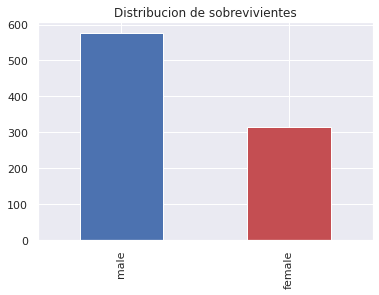

In [6]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de sobrevivientes')
plt.show()

From the previous plot, it is possible to see that there are more surviving men than women

**Encode categorical features with dummy variables**

In [9]:
y_target = train_df['Survived'].values # What we want to predict
data = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1) #we do not need this columns as a predictors

In [10]:
data = pd.get_dummies(data) # This ignores NAs
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


**Split data into train and test**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, y_target, test_size = .25, random_state = 1)

**Define the model**

In [12]:
model = tree.DecisionTreeClassifier().fit(x_train, y_train)

**Evaluate model**

In [13]:
model_accuracy = round(model.score(x_test, y_test), 4)
print('Mean accuracy: %0.4f' % (model_accuracy))

Mean accuracy: 0.7399


**Check ROC AUC score**

In [21]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
model_roc_auc_score = roc_auc_score(y_test, y_prob)
print('ROC AUC score: %0.4f' % (model_roc_auc_score))

ROC AUC score: 0.7174


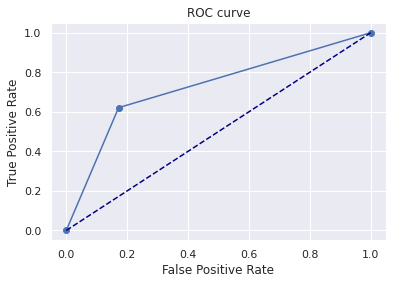

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()

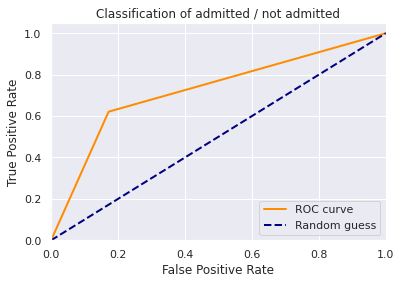

In [25]:
roc_p = roc_curve(y_test, y_pred)
plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of admitted / not admitted')
plt.legend(loc='lower right')
plt.show()

**Desicion Tree Visualization**

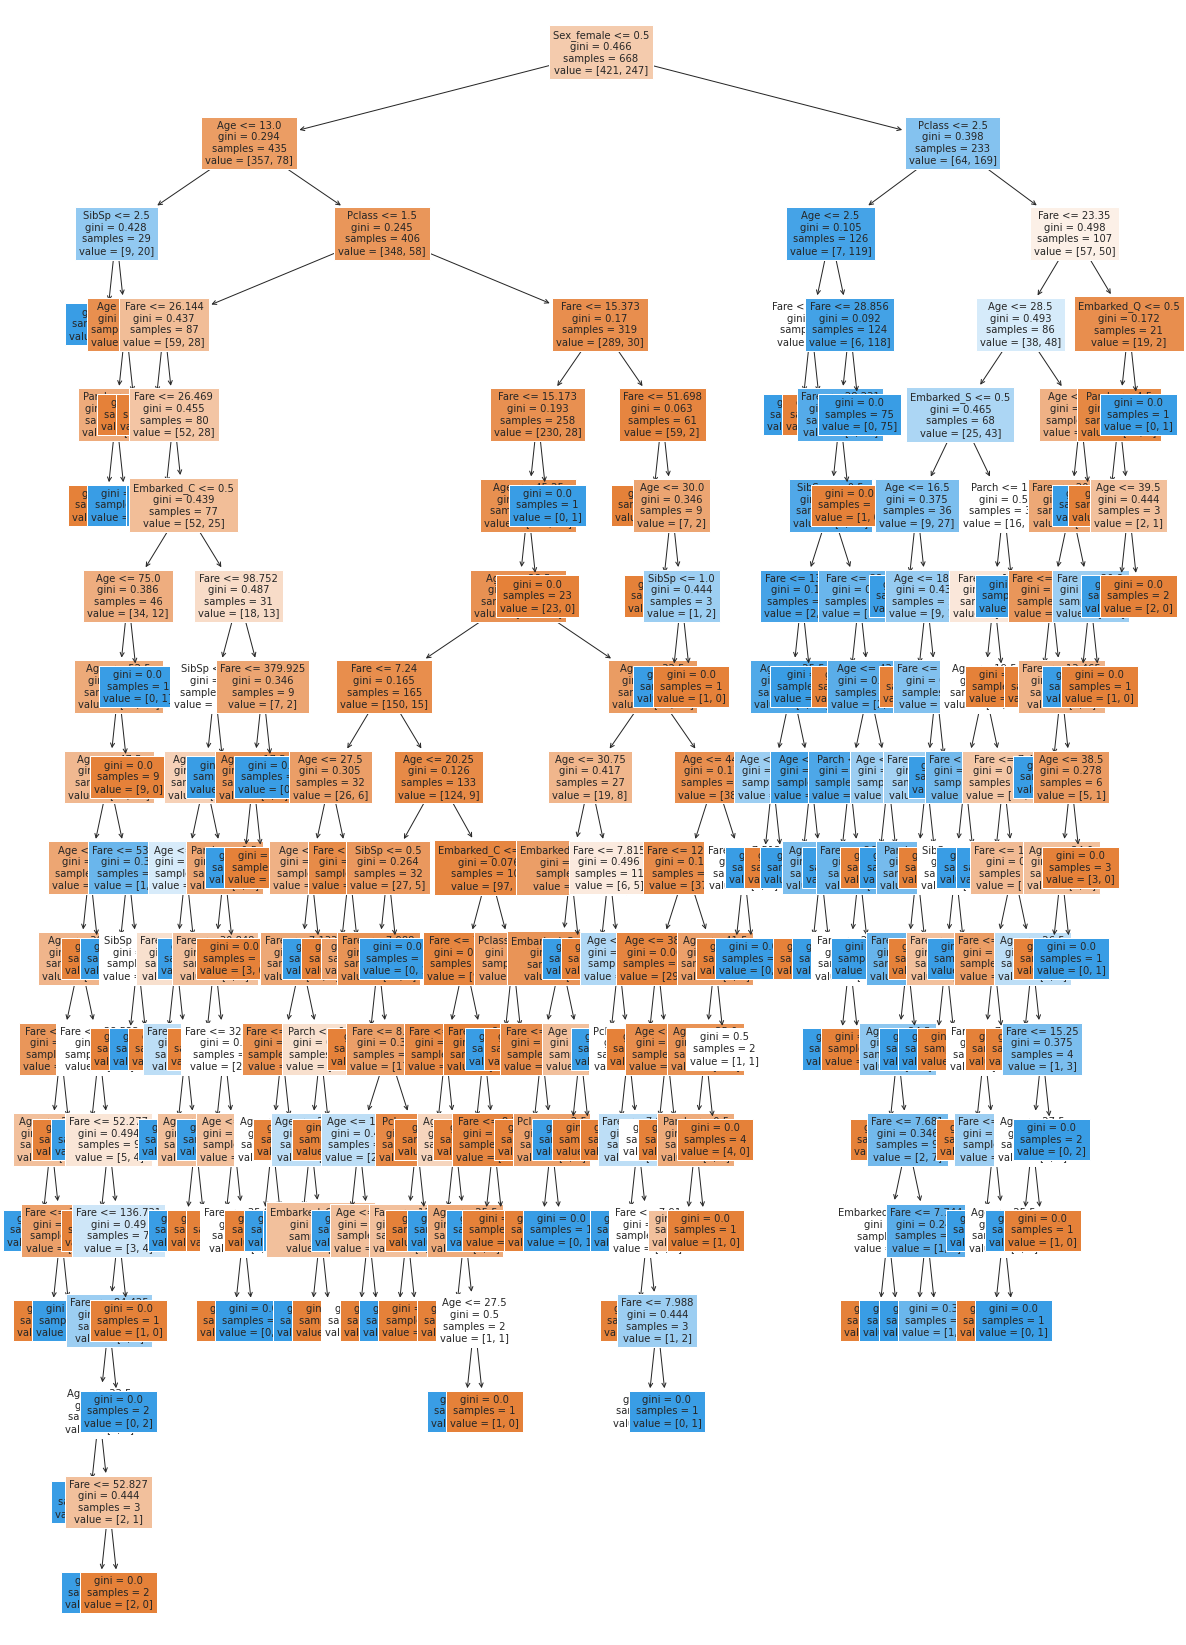

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 30))
plot_tree(decision_tree = model, feature_names = data.columns, filled = True, fontsize=10);

In [ ]:
# to save the image as a png
from io import StringIO 
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')